# Opening .svs images 
### Without Aperio software
### Using OpenSlide (open source)
#### http://openslide.org/

## Installation

1. Install openslide as per: http://openslide.org/download/ 
- OSX --> ```brew install openslide```
- Windows instructions--> https://openslide.org/docs/windows/



This https://openslide.org/docs/windows/ suggests that the easiest way to install is with precompiled binaries. The precompiled binary was downloaded, and is called openslide-win64-20171122. 

I have put that folder in hard_drive_documents/progams

I believe i can leave that there, and add the ```bin``` folder in it to my path 


Tried: going to the system preferences menu and then editing environment path to includ that folder, but no luck.

```cd env:```

```(ls path).value.split(";")``` returns a path which includes the folder, but still cannot import the file.

-----------------------------------------

Previous attempt: Failed because of a tar issue, after 45 mins of building from source. I think there is a 'simpler' way to install openslide (precompiled binaries).

    - ```git clone https://github.com/openslide/openslide-winbuild.git``` into local repositories collection
    - Download a java development kit (http://www.oracle.com/technetwork/java/javase/downloads/jdk10-downloads-4416644.html)
    - install cygwin https://www.cygwin.com/ making sure that the make start/desktop icons are selected
    - From Downloads folder, copy the setup-x86_64.exe executable to the openslide-winbuild folder for convenience later
    - Go to start/desktop Cygwin64 Terminal. Manually type in the cull path of the file in full quotes when navigating: 
        - ```cd "C:full\path\to\openslide-winbuild\folder"```
    - run ```./build.sh setup ./setup-x86_64.exe``` 
    - Then build by executing: ```./build.sh bdist``
    - ERROR: could not read tar file, https://lists.andrew.cmu.edu/pipermail/openslide-users/2014-November/000948.html same issue as this person.
    
    
-------------------------------------------
    
2. Then install openslide-python ---> ```pip install openslide-python```
3. Clone the github repo ---> git clone https://github.com/openslide/openslide-python.git
4. Take the examples folder and keep that in the same folder where your .svs image is. Navigate to that folder.
5. Utilise the example files with the .py suffix ---> python deepzoom/deepzoom_server.py image_name.svs
6. Copy the address it provides into a web browser to view image



## How to navigate and inspect the .svs data

In [20]:
import openslide
from openslide import deepzoom
from PIL import Image

In [18]:
slide = openslide.OpenSlide("test_tcga.svs")

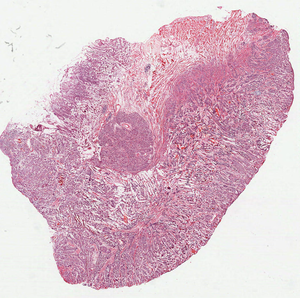

In [3]:
slide.dimensions
slide.get_thumbnail((300,300))

In [4]:
print('There are %s levels'%(slide.level_count))
print('Level dimensions (in thousands of pixels)')
for level in slide.level_dimensions:    
    print('\tLevel %s is %dk x %dk'%(slide.level_dimensions.index(level),level[0]/1000,level[1]/1000))
print('Downsampling at each level:',slide.level_downsamples)


There are 4 levels
Level dimensions (in thousands of pixels)
	Level 0 is 67k x 66k
	Level 1 is 16k x 16k
	Level 2 is 4k x 4k
	Level 3 is 2k x 2k
Downsampling at each level: (1.0, 4.000119260910681, 16.00238732718789, 32.00477465437578)


In [5]:
for item in slide.properties:
    print(item,'is:',slide.properties[item])

aperio.AppMag is: 40
aperio.DSR ID is: ap1546-dsr
aperio.Date is: 06/05/12
aperio.DisplayColor is: 0
aperio.Exposure Scale is: 0.000001
aperio.Exposure Time is: 109
aperio.Filename is: 34112
aperio.Focus Offset is: 0.000000
aperio.ICC Profile is: ScanScope v1
aperio.ImageID is: 34112
aperio.Left is: 29.908524
aperio.LineAreaXOffset is: 0.000000
aperio.LineAreaYOffset is: 0.000000
aperio.LineCameraSkew is: -0.000389
aperio.MPP is: 0.2520
aperio.OriginalHeight is: 66989
aperio.OriginalWidth is: 70000
aperio.ScanScope ID is: SS1302
aperio.StripeWidth is: 1000
aperio.Time is: 16:19:56
aperio.Time Zone is: GMT-07:00
aperio.Top is: 19.433084
aperio.User is: aece1193-1b82-4a48-b265-fcac0dd4eb8c
openslide.comment is: Aperio Image Library vFS90 01
70000x66989 [0,100 67147x66889] (256x256) J2K/YUV16 Q=70|AppMag = 40|StripeWidth = 1000|ScanScope ID = SS1302|Filename = 34112|Date = 06/05/12|Time = 16:19:56|Time Zone = GMT-07:00|User = aece1193-1b82-4a48-b265-fcac0dd4eb8c|MPP = 0.2520|Left = 29.908

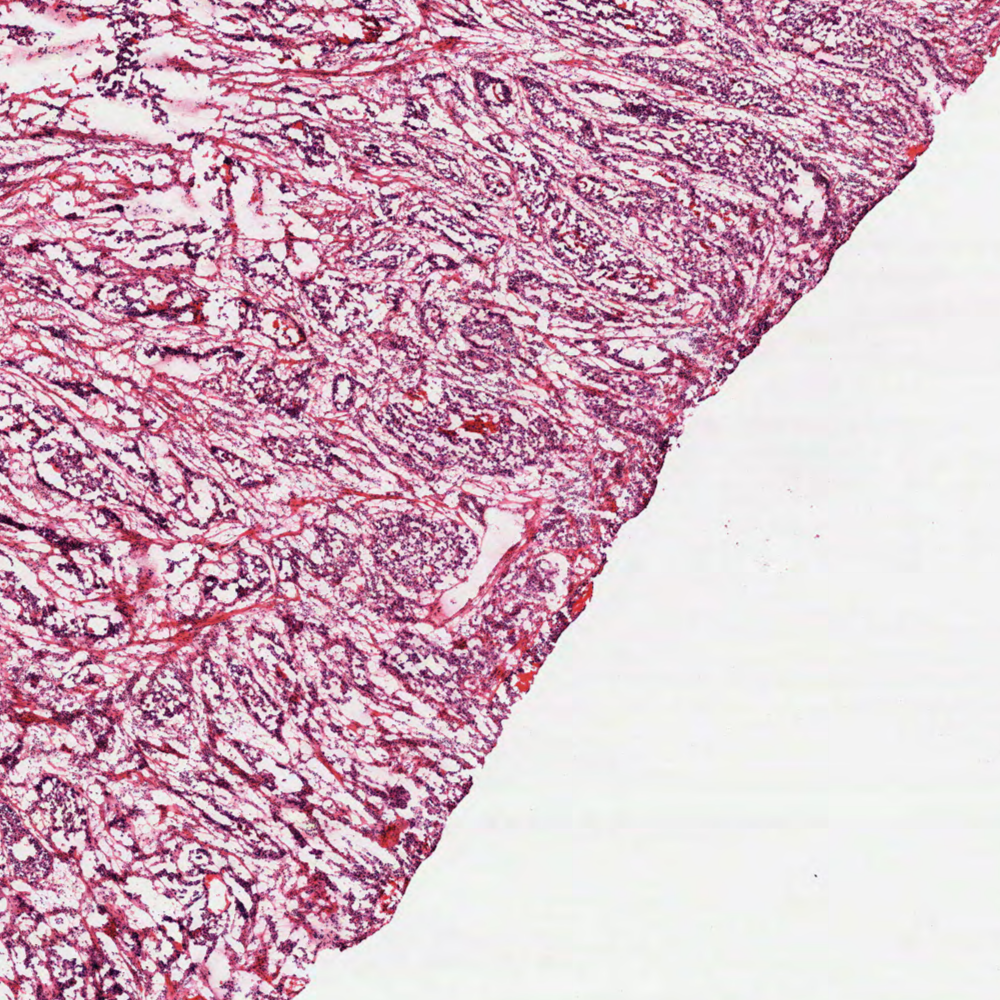

In [11]:
slide.read_region((40000,40000),2,(1000,1000))

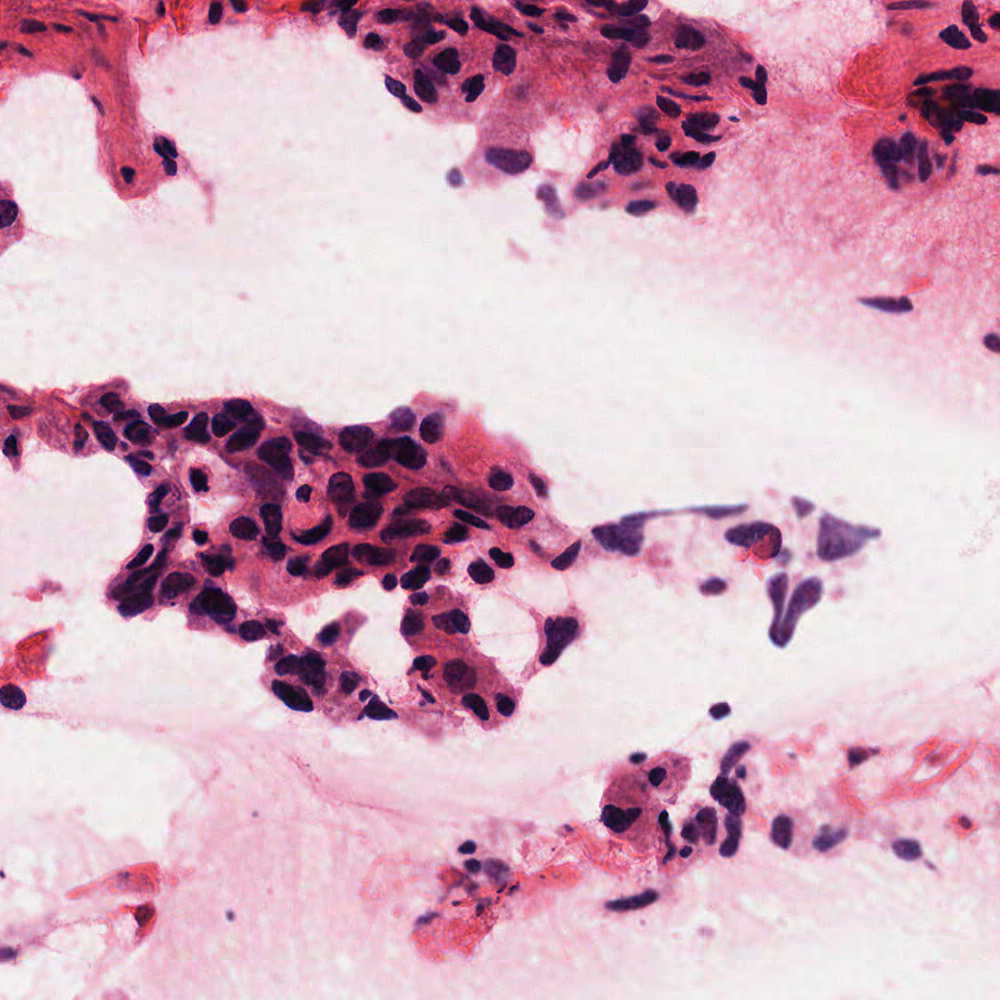

In [7]:
slide.read_region((40000,40000),0,(1000,1000))

## Turn slide into deepzoom object

In [21]:
zoomy = openslide.deepzoom.DeepZoomGenerator(slide)

In [56]:
print(zoomy.level_count,'levels')
print(zoomy.tile_count,'tiles total')

for level in range(zoomy.level_count.numerator):
    print('\tAt level %s, the edge fits %s tiles and is %s pixels wide'%(level,zoomy.level_tiles[level][0],zoomy.level_dimensions[level][0]))



18 levels
93477 tiles
	At level 0, the edge fits 1 tiles and is 1 pixels wide
	At level 1, the edge fits 1 tiles and is 2 pixels wide
	At level 2, the edge fits 1 tiles and is 3 pixels wide
	At level 3, the edge fits 1 tiles and is 5 pixels wide
	At level 4, the edge fits 1 tiles and is 9 pixels wide
	At level 5, the edge fits 1 tiles and is 17 pixels wide
	At level 6, the edge fits 1 tiles and is 33 pixels wide
	At level 7, the edge fits 1 tiles and is 66 pixels wide
	At level 8, the edge fits 1 tiles and is 132 pixels wide
	At level 9, the edge fits 2 tiles and is 263 pixels wide
	At level 10, the edge fits 3 tiles and is 525 pixels wide
	At level 11, the edge fits 5 tiles and is 1050 pixels wide
	At level 12, the edge fits 9 tiles and is 2099 pixels wide
	At level 13, the edge fits 17 tiles and is 4197 pixels wide
	At level 14, the edge fits 34 tiles and is 8394 pixels wide
	At level 15, the edge fits 67 tiles and is 16787 pixels wide
	At level 16, the edge fits 133 tiles and is 335

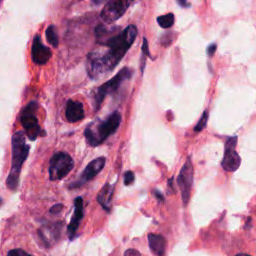

In [69]:
zoomy.get_tile(17,(153,100))

In [71]:
zoomy.get_tile_dimensions(17,(153,100))

(256, 256)